## test_mechanics.py

In [1]:
"""
test_mechanics.py

References:
    Vladimir Pletser - Lagrangian and Hamiltonian Analytical Mechanics Forty Exercises Resolved and Explained-Springer Singapore (2018).pdf
"""
import copy
import sys
import os
lstPaths = ["../src"]
for ipath in lstPaths:
    if ipath not in sys.path:
        sys.path.append(ipath)
from libsympy import *
from mechanics import *
from sympy.physics import mechanics
mechanics.mechanics_printing()
#print(sys.version)
#print(sys.path)
# Execute jupyter-notebook related commands.
exec(open('libnotebook.py').read())

libsympy is loaded.
libnotebook is loaded.


### Settings

In [3]:
### Settings
class sets:
    """
    Setttings class.
        
    Instead of settings class, settings nametuble might be used.
    Settings = namedtuple("Settings", "type dropinf delta")
    sets = Settings(type="symbolic", dropinf=True, delta=0.1)
    """
    global dictflow, test_all
    
    def __init__(self):
        pass
    
    input_dir  = "input/mechanics"
    output_dir = "output/mechanics"
    
    # Plotting settings
    plot_time_scale = {1:"xy", 2:"xz", 3:"yz"}[3]
    
    # Execution settings.
    test_all = {0:False, 1:True}[1]
    dictflow = {100:"get_formulary", 150:"get_subformulary",
                200:"simple_harmonic_oscillator_scalar", 201:"simple_harmonic_oscillator_vectorial", 
                2321:"coordinate_systems"}
    flow = [dictflow[i] for i in [2321]]
    if test_all: flow = [dictflow[i] for i in dictflow.keys()]

In [3]:
print("Test of the {0}.".format(sets.flow))

Test of the ['get_formulary', 'get_subformulary', 'simple_harmonic_oscillator_scalar', 'simple_harmonic_oscillator_vectorial', 'coordinate_systems'].


### get_formulary

In [ ]:
### get_formulary
if "get_formulary" in sets.flow:
    omech.class_type = "scalar"
    omech.__init__()
    omech.output_style = "latex"
    omech.get_formulary()
    omech.get_formulary(style="eq")
    
    omech.class_type = "vectorial"
    omech.__init__()
    omech.get_formulary()    
    
    omech.class_type = "EulerLagrange"
    omech.__init__()
    omech.get_formulary()    

### get_subformulary

In [ ]:
if "get_subformulary" in sets.flow:
    omech.__init__()
    omech.get_subformulary()

### simple_harmonic_oscillator_scalar

'solve NewtonsLaw2 Derivative(x(t), (t, 2))'

solve(Eq(F, m*Derivative(x(t), (t, 2))), Derivative(x(t), (t, 2)))


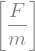

"Newton's 2nd Law"

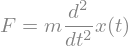

"Hooke's Law"

'Eq NewtonsLaw2 HookesLaw'

Equality(k*x(t) + m*Derivative(x(t), (t, 2)), 0)


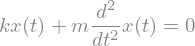

'subs omech.result [(k/m, w**2)]'

Eq(k*x(t)/m + Derivative(x(t), (t, 2)), 0)(subs, [(k/m, w**2)])


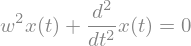

Codes:
 Equality(k*x(t) + m*Derivative(x(t), (t, 2)), 0)
 Eq(k*x(t)/m + Derivative(x(t), (t, 2)), 0)(subs, [(k/m, w**2)])



'dsolve omech.result x(t)'

dsolve(Eq(w**2*x(t) + Derivative(x(t), (t, 2)), 0), x(t))


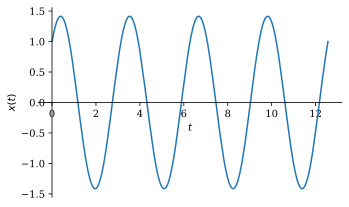

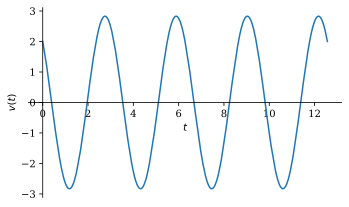

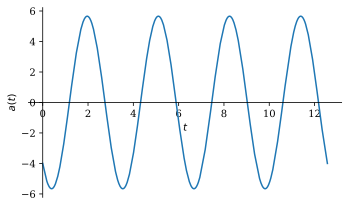

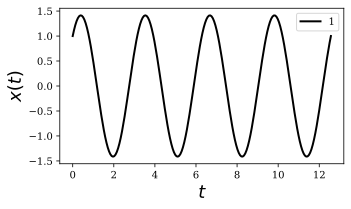

In [4]:
if "simple_harmonic_oscillator_scalar" in sets.flow:
    """       
    Example: Solve a from F = ma
    """
#    omech = mechanics() # DO NOT create any instance.
    omech.class_type = "scalar"
    omech.__init__()
    omech.solver.verbose = True
    commands = ["solve", "NewtonsLaw2", omech.a.rhs]
    omech.process(commands)


    """
    Example: Solve position of a spring mass system.
    F = ma, F = -kx
    -kx = ma
    -kx = m d^2 x/dt^2
    w = sqrt(k/m)
    x(t) = C1*sin(wt) + C2*sin(wt)
    """
    # Scalar Way.
    omech.class_type = "scalar"
    omech.__init__()
    omech.solver.verbose = True
    display("Newton's 2nd Law", omech.NewtonsLaw2, 
            "Hooke's Law", omech.HookesLaw)
    commands = ["Eq", "NewtonsLaw2", "HookesLaw"]
#    commands = ["subs", "omech.result", [(a, diff(x, t, 2, evaluate=False))]]
    res = omech.process(commands)
    simp = simplify(res.lhs/m)
    omech.result = Eq(simp, 0)
    commands = ["subs", "omech.result", [(k/m, w**2)]]
    omech.process(commands)
    commands = ["dsolve", "omech.result", x]
    print("Codes:\n", *omech.solver.get_codes())
    
    omech.x = omech.process(commands).rhs
    v = omech.v.evalf(subs={x:omech.x}).doit()
    a = omech.a.evalf(subs={x:omech.x}).doit()
    display(omech.result,v,a)
    
    # Numerical calculations
    [C1,C2] = symbols('C1 C2')
    numvals = {C1:1, C2:1, w:2}
#    commands = ["xreplace", "omech.x", numvals]
#    omech.process(commands)
    x = omech.x.evalf(subs=numvals).doit()
    v = v.evalf(subs=numvals).rhs
    a = a.evalf(subs=numvals).rhs
    plot(x, (t,0,4*pi,200), xlabel="$t$", ylabel="$x(t)$")
    plot(v, (t,0,4*pi,200), xlabel="$t$", ylabel="$v(t)$")
    plot(a, (t,0,4*pi,200), xlabel="$t$", ylabel="$a(t)$")
    plot_sympfunc([x.subs({t:var('x')}),], (0, float(4*pi), 200), 
                   xlabel="$t$", ylabel="$x(t)$")

### simple_harmonic_oscillator_vectorial     

'Eq NewtonsLaw2 HookesLaw'

Equality(k*x(t) + m*Derivative(x(t), (t, 2)), 0)


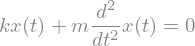

'Eq NewtonsLaw2 HookesLaw'

Equality(k*x(t) + m*Derivative(x(t), (t, 2)), 0)


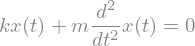

'subs omech.result [(k/m, w**2)]'

Eq(k*x(t)/m + Derivative(x(t), (t, 2)), 0)(subs, [(k/m, w**2)])


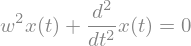

Codes:
 Equality(k*x(t) + m*Derivative(x(t), (t, 2)), 0)
 Equality(k*x(t) + m*Derivative(x(t), (t, 2)), 0)
 Eq(k*x(t)/m + Derivative(x(t), (t, 2)), 0)(subs, [(k/m, w**2)])



'dsolve omech.result x(t)'

dsolve(Eq(w**2*x(t) + Derivative(x(t), (t, 2)), 0), x(t))


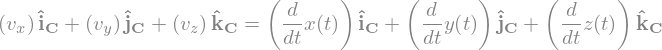

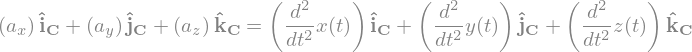

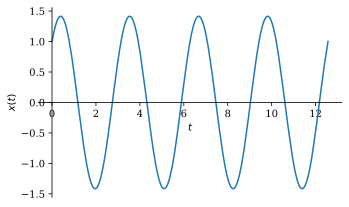

ValueError: 
Can't calculate derivative wrt 0.0.

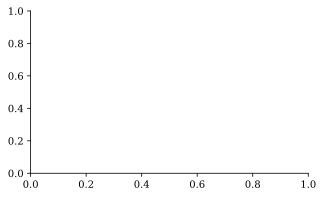

In [5]:
if "simple_harmonic_oscillator_vectorial" in sets.flow:
#    todo error occurs at "Eq" due to undefined 0 vector. ???
    # Vectorial Way.
    omech.class_type = "vectorial"
    omech.__init__()
    omech.solver.verbose = True
    commands = ["Eq", "NewtonsLaw2", "HookesLaw"]
    omech.process(commands)
#    commands = ["subs", "omech.result", [(a, diff(x, t, 2, evaluate=False))]]
    res = omech.process(commands)
    simp = simplify(res.lhs/m)
    omech.result = Eq(simp, 0)
    commands = ["subs", "omech.result", [(k/m, w**2)]]
    omech.process(commands)
    commands = ["dsolve", "omech.result", omech.x]
    print("Codes:\n", *omech.solver.get_codes())
    
    omech.x = omech.process(commands).rhs
    v = omech.v.evalf(subs={x:omech.x}).doit()
    a = omech.a.evalf(subs={x:omech.x}).doit()
    display(omech.result,v,a)
    
    # Numerical calculations
    [C1,C2] = symbols('C1 C2')
    numvals = {C1:1, C2:1, w:2}
#    commands = ["xreplace", "omech.x", numvals]
#    omech.process(commands)
    x = omech.x.evalf(subs=numvals).doit()
    v = v.evalf(subs=numvals).rhs.components[C.i]
    a = a.evalf(subs=numvals).rhs.components[C.i]
    plot(x, (t,0,4*pi,200), xlabel="$t$", ylabel="$x(t)$")
    plot(v, (t,0,4*pi,200), xlabel="$t$", ylabel="$v(t)$")
    plot(a, (t,0,4*pi,200), xlabel="$t$", ylabel="$a(t)$")
    plot_sympfunc([x.subs({t:var('x')}),], (0, float(4*pi), 200), 
                   xlabel="$t$", ylabel="$x(t)$")

### coordinate_systems    

Coordinate Systems
Polar Coordinates


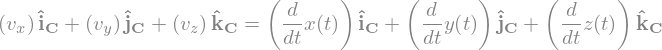

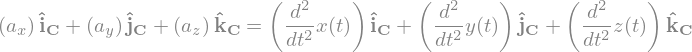

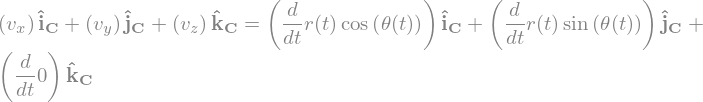

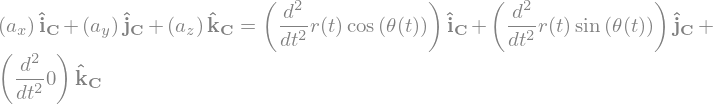

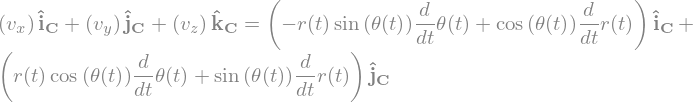

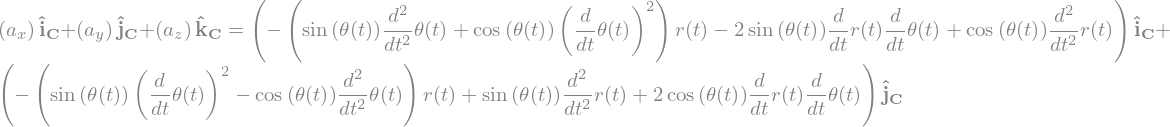

Components of r


Components of v


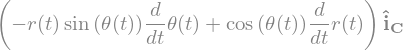

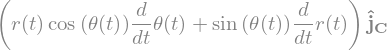

Components of a


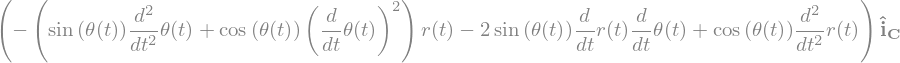

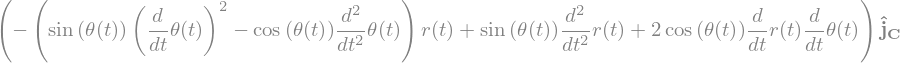

In [4]:
if "coordinate_systems" in sets.flow:
    print("Coordinate Systems")
    
    print("Polar Coordinates")
    omech.class_type = "vectorial"
    omech.__init__()
    omech.solver.verbose = False
    
    xreplaces = {x:r*cos(theta)*C.i,
                  y:r*sin(theta)*C.j,
                  z:0}
    xreplaces = {x:omech.subformulary.pol_to_cart_x,
                 y:omech.subformulary.pol_to_cart_y,
                 z:0} # C.k
    display(omech.r, omech.v, omech.a)
    display(xreplaces)

    commands = ["xreplace", "omech.r", xreplaces]
    r = omech.process(commands).doit()
    commands = ["xreplace", "omech.v", xreplaces]
    v = omech.process(commands).doit()
    commands = ["xreplace", "omech.a", xreplaces]
    a = omech.process(commands).doit()
    display(x,y,z,r,v,a)
    
    print("Components of r")
    [display(r.rhs.args[i]) for i in range(2)]
    print("Components of v")
    [display(v.rhs.args[i]) for i in range(2)]
    print("Components of a")
    [display(a.rhs.args[i]) for i in range(2)]